In [61]:
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

#x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#x_guess_value=[2.566273173735981, 2.080269812748112, -0.952352861123224, -3.999772472771436, 1.0478441097471995, 0.27733289435862724, 0.24544286399732934, 0.09000764616853156, -0.702130644793348, 2.90956950404361, 4.0, -2.0061499638730376, 0.5605743348320661, 1.0741637968252291, 0.15280691385990838, 0.5605741052229537, 1.074163538481987, 0.15280694455658408, 0.5605742239982301, 1.0741636553746723, 0.1528069645196789, 0.5605741921849995, 1.0741639253822755, 0.15280687268417525, 0.5605741036870606, 1.0741640472826495, 0.1528068029727265, 0.5605741653488023, 1.0741634644224083, 0.15280696830049542]
x_guess_value=[2.5662730212553724, 2.0802693649204613, -0.9523523757402763, -3.999772120609139, 1.0478492649040834, 0.2773364073738823, 0.24544581726558923, 0.09000671441950694, -0.7021313266782161, 2.9095696589682767, 4.0, -2.00614993552617, 0.5605747538788711, 1.0741631983685225, 0.15280654663765786, 0.5605745242702825, 1.074162940025697, 0.15280657733456116, 0.5605746430454945, 1.0741630569181202, 0.15280659729773755, 0.5605746112313923, 1.0741633269261313, 0.1528065054618947, 0.5605745227342692, 1.0741634488278236, 0.1528064357514464, 0.5605745843962557, 1.0741628659668094, 0.1528066010790178]
no_time_points=29
nn=10
mu=1.75
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

[2.56627199233252, 2.080275241398469, -0.9523492463523434, -3.9997727173469664, 1.0478493805868072, 0.2773337252601643, 0.24544868084536453, 0.09000066392567682, -0.7021350239711753, 2.909570746123328, 4.0, -2.006154774690564, 0.5605740405245598, 1.0741639974480754, 0.15280747434211703, 0.5605738109143705, 1.074163739108233, 0.15280750504011173, 0.5605739296853807, 1.074163855996309, 0.15280752500032316, 0.5605738978748255, 1.0741641260070849, 0.1528074331646804, 0.5605738093782117, 1.0741642479086135, 0.15280736345361365, 0.560573871039598, 1.0741636650490727, 0.15280752878676934]
0.00024347649636080528


In [62]:
## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
#x=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]
#x=[1.9636168404047483, 2.145062034793855, -1.0476750072545036, -2.3069912527229834, 0.9951769162095147, 0.566744327381311, 0.5625636918108599, 0.5724336677216537, -0.1643962885008925, 2.6594876066678763, 4.0, -2.0441087324050193, 0.9131977430516675, 0.8648324390190371, 0.711130206805505]
#x=[1.9636828124246373, 1.9751960003155784, -0.9960992655939163, -2.4659309363610524, 1.157183704637704, 0.8147722398616474, 0.1738133026345142, 0.5706953521795944, -0.5031387294702394, 2.633676535206513, 3.897533348731381, -2.006427042273786, 0.6705693114289116, 1.1943371722291585, 0.7370073098006171, 0.6705693837383562, 1.1943371245325487, 0.7370073092171942, 0.6705693600387478, 1.1943371902011612, 0.737007291844871]
x=[2.56627199233252, 2.080275241398469, -0.9523492463523434, -3.9997727173469664, 1.0478493805868072, 0.2773337252601643, 0.24544868084536453, 0.09000066392567682, -0.7021350239711753, 2.909570746123328, 4.0, -2.006154774690564, 0.5605740405245598, 1.0741639974480754, 0.15280747434211703, 0.5605738109143705, 1.074163739108233, 0.15280750504011173, 0.5605739296853807, 1.074163855996309, 0.15280752500032316, 0.5605738978748255, 1.0741641260070849, 0.1528074331646804, 0.5605738093782117, 1.0741642479086135, 0.15280736345361365, 0.560573871039598, 1.0741636650490727, 0.15280752878676934]
y_nn_list=[]

time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list.append(y_fun)
    x=realx


In [63]:
#######################################################################
#mu = 1.25
#######################################################################

## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

#x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#x_guess_value=[1.903717767341538, 1.9655726855268492, -0.6717732897143843, -4.0, 1.4570332425474053, 0.6039676993449669, 0.7771945908879749, 1.0843310285709822, -0.548541830822284, 2.3108302673019634, 2.856793987576043, -1.108421710329937, 0.12484217852162958, 1.1534187533858784, 0.9918874868721446, 0.12484217924390409, 1.153418662294108, 0.9918875558469815, 0.12484218111829123, 1.1534186607445465, 0.9918875637887178, 0.12484206764714387, 1.1534188990575276, 0.9918874481384322, 0.12484200713791342, 1.1534190519195906, 0.9918873670325928, 0.12484205916387432, 1.1534189989296093, 0.991887389013161]
x_guess_value=[1.9042903343339306, 1.970139031100169, -0.6732086638964272, -3.999490180439005, 1.459724743468276, 0.6016614182598016, 0.7740101003940615, 1.088396285906298, -0.5401783511586682, 2.313723528753808, 2.8502678355037863, -1.1314297299932765, 0.12523119811608033, 1.1535147475831042, 0.9917016034037537, 0.1252311985856951, 1.1535146566476513, 0.9917016722258001, 0.12523120053328926, 1.153514655046354, 0.9917016801566874, 0.12523108736181057, 1.153514893438107, 0.9917015651121981, 0.12523102708073278, 1.1535150460084356, 0.9917014842675055, 0.12523107937379735, 1.153514993559683, 0.9917015064388769]
no_time_points=29
nn=10
mu=1.25
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

    # Plotting NN solution

[1.9042903343339306, 1.970139031100169, -0.6732086638964272, -3.999490180439005, 1.459724743468276, 0.6016614182598016, 0.7740101003940615, 1.088396285906298, -0.5401783511586682, 2.313723528753808, 2.8502678355037863, -1.1314297299932765, 0.12523119811608033, 1.1535147475831042, 0.9917016034037537, 0.1252311985856951, 1.1535146566476513, 0.9917016722258001, 0.12523120053328926, 1.153514655046354, 0.9917016801566874, 0.12523108736181057, 1.153514893438107, 0.9917015651121981, 0.12523102708073278, 1.1535150460084356, 0.9917014842675055, 0.12523107937379735, 1.153514993559683, 0.9917015064388769]
0.0002130885044149881


In [64]:
#x=[1.9021238144917452, 2.0885499362031026, -1.0609756706945612, -2.2353048704390854, 1.3226840004715401, 0.37379541803347394, 0.4039681806237086, 0.320364823795562, -0.4632476135510047, 2.568217217861064, 3.964190640703529, -2.0495717972220193]
#x=[1.799474136044125, 1.7443853658025856, -0.7680040300699905, -2.333609275395546, 1.1788482169105574, 0.6813491019955505, 0.3345783407643817, 0.527697362780281, -0.210180706499276, 2.285457055927685, 3.2687744747575422, -1.3460892050394115, 0.7967340658023397, 1.0911750309294888, 0.8245253759239951]
#x=[1.7809393707598804, 1.6117591418617399, -0.7579469692990352, -2.769974809856413, 1.1450662312357218, 0.7408923838624734, 0.08656830191447774, 0.6122561174782395, -0.2634923063124371, 2.2894171591834143, 3.2603865618594297, -1.3741098106007417, 0.5927280131040431, 1.0791697595305536, 0.6897346911868526, 0.5927280067652738, 1.0791697685718273, 0.6897346868586322, 0.5927280244971863, 1.079169766697952, 0.6897346837223515]
#x=[1.903717767341538, 1.9655726855268492, -0.6717732897143843, -4.0, 1.4570332425474053, 0.6039676993449669, 0.7771945908879749, 1.0843310285709822, -0.548541830822284, 2.3108302673019634, 2.856793987576043, -1.108421710329937, 0.12484217852162958, 1.1534187533858784, 0.9918874868721446, 0.12484217924390409, 1.153418662294108, 0.9918875558469815, 0.12484218111829123, 1.1534186607445465, 0.9918875637887178, 0.12484206764714387, 1.1534188990575276, 0.9918874481384322, 0.12484200713791342, 1.1534190519195906, 0.9918873670325928, 0.12484205916387432, 1.1534189989296093, 0.991887389013161]
x=[1.9042903343339306, 1.970139031100169, -0.6732086638964272, -3.999490180439005, 1.459724743468276, 0.6016614182598016, 0.7740101003940615, 1.088396285906298, -0.5401783511586682, 2.313723528753808, 2.8502678355037863, -1.1314297299932765, 0.12523119811608033, 1.1535147475831042, 0.9917016034037537, 0.1252311985856951, 1.1535146566476513, 0.9917016722258001, 0.12523120053328926, 1.153514655046354, 0.9917016801566874, 0.12523108736181057, 1.153514893438107, 0.9917015651121981, 0.12523102708073278, 1.1535150460084356, 0.9917014842675055, 0.12523107937379735, 1.153514993559683, 0.9917015064388769]
y_nn_list1=[]
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list1.append(y_fun)
    x=realx

In [65]:
############################################################
# mu = 0.75
############################################################
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

#x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#x_guess_value=[1.6723635572786484, 1.5010670052411612, -0.7538620960442436, -2.534238760462463, 1.269502399109574, 0.7675030055888193, -0.062425574805859925, 0.5903308671584282, -0.2308974124027561, 2.2838885509360853, 3.1619367466335326, -1.30474343941252, 0.5222853295531048, 1.4576448973481155, 0.5098647407303188, 0.5222853399556657, 1.4576449053841456, 0.5098647400123857, 0.5222853286770568, 1.4576448936446285, 0.5098647427244595, 0.5222853306786346, 1.457644902519896, 0.509864742379792, 0.522285327719563, 1.4576448945675546, 0.5098647511199209, 0.5222853253092525, 1.4576448897916976, 0.5098647439411231]
x_guess_value=[1.6312998696215264, 1.4123456277575217, -0.7112740099531392, -2.5263393367282174, 1.2248545251862775, 0.7636585764273509, -0.06578954818991913, 0.5950660474719006, -0.23064112684866153, 2.2727271167913172, 3.1774317862829267, -1.1733957821996674, 0.5298880770734266, 1.4502877594618826, 0.5139491680990477, 0.529888089622956, 1.4502877679978539, 0.5139491689362821, 0.5298880781120596, 1.4502877551779363, 0.513949170167742, 0.5298880784923019, 1.450287764477487, 0.5139491693815879, 0.529888076564438, 1.4502877578544604, 0.5139491797986863, 0.529888074125113, 1.450287753764945, 0.5139491716535882]
no_time_points=29
nn=10
mu=0.75
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1



[1.6312998696215264, 1.4123456277575217, -0.7112740099531392, -2.5263393367282174, 1.2248545251862775, 0.7636585764273509, -0.06578954818991913, 0.5950660474719006, -0.23064112684866153, 2.2727271167913172, 3.1774317862829267, -1.1733957821996674, 0.5298880770734266, 1.4502877594618826, 0.5139491680990477, 0.529888089622956, 1.4502877679978539, 0.5139491689362821, 0.5298880781120596, 1.4502877551779363, 0.513949170167742, 0.5298880784923019, 1.450287764477487, 0.5139491693815879, 0.529888076564438, 1.4502877578544604, 0.5139491797986863, 0.529888074125113, 1.450287753764945, 0.5139491716535882]
5.664665224398408e-05


In [66]:
#x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]
#x=[1.7957982522008085, 1.7510809493201245, -0.7580219241588566, -2.3023017046763035, 1.146373572901348, 0.6825883658263888, 0.3807588855168693, 0.5036118325266752, -0.19244340100810875, 2.273759848869776, 3.251450172007368, -1.2702234443144609, 0.8407767657164621, 1.118885799615362, 0.8059688079273978]
#x=[1.7377264421928829, 1.5854741041258904, -0.7480180754422704, -2.751193180848643, 1.1575799236138653, 0.6940785256267336, 0.0835717852675935, 0.6230745929098889, -0.26340110224944885, 2.279865118775377, 3.226085068371746, -1.3089826112423673, 0.5827145315238311, 1.0986590925781983, 0.6045800496462733, 0.582714529921309, 1.0986591007446824, 0.6045800604257673, 0.5827145273779262, 1.0986590953232398, 0.6045800530916124]
#x=[1.6723635572786484, 1.5010670052411612, -0.7538620960442436, -2.534238760462463, 1.269502399109574, 0.7675030055888193, -0.062425574805859925, 0.5903308671584282, -0.2308974124027561, 2.2838885509360853, 3.1619367466335326, -1.30474343941252, 0.5222853295531048, 1.4576448973481155, 0.5098647407303188, 0.5222853399556657, 1.4576449053841456, 0.5098647400123857, 0.5222853286770568, 1.4576448936446285, 0.5098647427244595, 0.5222853306786346, 1.457644902519896, 0.509864742379792, 0.522285327719563, 1.4576448945675546, 0.5098647511199209, 0.5222853253092525, 1.4576448897916976, 0.5098647439411231]
x=[1.6312998696215264, 1.4123456277575217, -0.7112740099531392, -2.5263393367282174, 1.2248545251862775, 0.7636585764273509, -0.06578954818991913, 0.5950660474719006, -0.23064112684866153, 2.2727271167913172, 3.1774317862829267, -1.1733957821996674, 0.5298880770734266, 1.4502877594618826, 0.5139491680990477, 0.529888089622956, 1.4502877679978539, 0.5139491689362821, 0.5298880781120596, 1.4502877551779363, 0.513949170167742, 0.5298880784923019, 1.450287764477487, 0.5139491693815879, 0.529888076564438, 1.4502877578544604, 0.5139491797986863, 0.529888074125113, 1.450287753764945, 0.5139491716535882]
y_nn_list2=[]
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list2.append(y_fun)
    x=realx

In [72]:
############################################################
# mu = 2.25
############################################################
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

#x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#x_guess_value=[1.8703488069604393, 1.7777067792276389, -1.1344821991969225, -2.1025162924608267, 0.7770825305339494, -0.21592958562658762, 0.4888373061513815, 0.27154256485911454, -1.1531622789291538, 4.0, 4.0, -2.203070772329348, 1.5190100729287135, 1.639418318029922, -0.08886462437357362, 1.518584172082528, 1.6406009246790476, -0.09097333342994812, 1.5189079075819067, 1.6396991660066864, -0.08937266061107152, 1.5188234196233321, 1.6399359361263455, -0.08979352116619778, 1.51898088332098, 1.6394968990504795, -0.08900816001331477, 1.5189611752169907, 1.6395529330504905, -0.08910860132573777]
#x_guess_value=[2.0773939707616234, 1.8735365846622536, -0.9969030956393559, -2.0458812015505154, 0.760222671857398, -0.06996754879396426, 0.5072223448886891, 0.15043219830215152, -0.9218894001081792, 4.0, 4.0, -2.084512591252282, 1.5142961986029635, 1.6535716191475105, -0.13528154560389025, 1.5139208998721425, 1.6545897613432452, -0.1369776228680776, 1.514206193732374, 1.6538125676330222, -0.13569002632312363, 1.5141319311943935, 1.6540163128514047, -0.1360281774636329, 1.51427051578268, 1.6536389271710261, -0.1353969423228781, 1.5142531760335112, 1.653687059187057, -0.13547766176898152]
#x_guess_value=[1.7248366413056007, 1.716416182390077, -1.1002800810023126, -2.106221696829878, 0.8513993495478513, -0.2605999789928227, 0.37003628670988714, 0.24243488167166874, -1.2835993886869914, 4.0, 4.0, -2.200578873156941, 1.5014629521433895, 1.6517546909781684, -0.14614632230522964, 1.5010220282737015, 1.6530210912374006, -0.14883944374843028, 1.501357896719549, 1.6520561813637802, -0.14679490786078966, 1.501270959722775, 1.6523091882028682, -0.1473323643605338, 1.501434705466407, 1.6518394049006544, -0.14632817433847228, 1.5014141075025553, 1.6518992763282583, -0.14645722254314417]
x_guess_value=[3.0204411930685167, 1.9783206399865738, -0.5179800796433154, -1.9264125156832346, 0.8486561626565, -0.06927813947772102, 0.6551681725635325, 0.03889808833386866, -0.8650278665057474, 4.407746482069388, 4.261793055827633, -2.17998306888853, 1.469510476868044, 1.9160974602773788, -0.5314064936340311, 1.4698007794065975, 1.9165233536922917, -0.532000477827397, 1.4695814715197124, 1.9161957126660494, -0.5315464497371098, 1.4696402513314206, 1.9162787902138974, -0.5316618452338757, 1.4695317146471398, 1.9161251926524863, -0.5314457077623002, 1.469546139334021, 1.9161447313051785, -0.5314734392905305]
no_time_points=29
nn=10
mu=2.25
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
#bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
bnds=((-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20),(-20,20))

res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
    
#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
#x=[1.9021238144917452, 2.0885499362031026, -1.0609756706945612, -2.2353048704390854, 1.3226840004715401, 0.37379541803347394, 0.4039681806237086, 0.320364823795562, -0.4632476135510047, 2.568217217861064, 3.964190640703529, -2.0495717972220193]
#x=[1.8024272288812488, 1.7402305438649304, -0.741977452594889, -2.2580935825072723, 1.29007611606214, 0.4878170014882966, 0.4244365764229374, 0.4691770506909149, -0.16107510508646117, 2.2761954927171373, 3.2698588918860367, -1.2832567830405648]
#x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]


[3.0204411930685167, 1.9783206399865738, -0.5179800796433154, -1.9264125156832346, 0.8486561626565, -0.06927813947772102, 0.6551681725635325, 0.03889808833386866, -0.8650278665057474, 4.407746482069388, 4.261793055827633, -2.17998306888853, 1.469510476868044, 1.9160974602773788, -0.5314064936340311, 1.4698007794065975, 1.9165233536922917, -0.532000477827397, 1.4695814715197124, 1.9161957126660494, -0.5315464497371098, 1.4696402513314206, 1.9162787902138974, -0.5316618452338757, 1.4695317146471398, 1.9161251926524863, -0.5314457077623002, 1.469546139334021, 1.9161447313051785, -0.5314734392905305]
0.0007442224694904696


In [74]:
#x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]
#x=[0.34024099373253075, 2.401631871498605, -1.9667533838968982, -1.192433784697199, 1.162654064447874, 0.6873885758664002, 0.4095451435586556, 0.913922200330133, 0.9360336440412774, 4.0, 4.0, -2.2537669840065027, 1.3816685797199812, 1.5262729673067108, -0.49771018850762433]
#x=[1.718263180834244, 2.02666478265968, -1.078915722683296, -3.3480171512087016, 1.1240080189159358, 0.40576998671592884, 0.060928971353482034, 0.7945111532693508, -0.8400559633893537, 4.0, 4.0, -2.1440591267560043, 0.4748526445165418, 0.6881561137953243, 0.5159073738815193, 0.47485629388495276, 0.6881588230497957, 0.5159109203733128, 0.4748505513920818, 0.6881541183099358, 0.5159047359551744]
#x=[2.0773939707616234, 1.8735365846622536, -0.9969030956393559, -2.0458812015505154, 0.760222671857398, -0.06996754879396426, 0.5072223448886891, 0.15043219830215152, -0.9218894001081792, 4.0, 4.0, -2.084512591252282, 1.5142961986029635, 1.6535716191475105, -0.13528154560389025, 1.5139208998721425, 1.6545897613432452, -0.1369776228680776, 1.514206193732374, 1.6538125676330222, -0.13569002632312363, 1.5141319311943935, 1.6540163128514047, -0.1360281774636329, 1.51427051578268, 1.6536389271710261, -0.1353969423228781, 1.5142531760335112, 1.653687059187057, -0.13547766176898152]
#x=[1.7248366413056007, 1.716416182390077, -1.1002800810023126, -2.106221696829878, 0.8513993495478513, -0.2605999789928227, 0.37003628670988714, 0.24243488167166874, -1.2835993886869914, 4.0, 4.0, -2.200578873156941, 1.5014629521433895, 1.6517546909781684, -0.14614632230522964, 1.5010220282737015, 1.6530210912374006, -0.14883944374843028, 1.501357896719549, 1.6520561813637802, -0.14679490786078966, 1.501270959722775, 1.6523091882028682, -0.1473323643605338, 1.501434705466407, 1.6518394049006544, -0.14632817433847228, 1.5014141075025553, 1.6518992763282583, -0.14645722254314417]
x=[3.0204411930685167, 1.9783206399865738, -0.5179800796433154, -1.9264125156832346, 0.8486561626565, -0.06927813947772102, 0.6551681725635325, 0.03889808833386866, -0.8650278665057474, 4.407746482069388, 4.261793055827633, -2.17998306888853, 1.469510476868044, 1.9160974602773788, -0.5314064936340311, 1.4698007794065975, 1.9165233536922917, -0.532000477827397, 1.4695814715197124, 1.9161957126660494, -0.5315464497371098, 1.4696402513314206, 1.9162787902138974, -0.5316618452338757, 1.4695317146471398, 1.9161251926524863, -0.5314457077623002, 1.469546139334021, 1.9161447313051785, -0.5314734392905305]
y_nn_list3=[]
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list3.append(y_fun)
    x=realx

In [75]:
############################################################
# mu = 0.25
############################################################
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

#x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
x_guess_value=[1.3178010366333026, 1.8478336816922043, -0.7224848525433315, -2.5183567457388927, 1.063929347123931, 0.4829384375771423, 0.8062575939844014, 0.7277889237105779, -0.4880300690998417, 2.1753549085885453, 3.2646096100498614, -0.74124004020218, 0.3353319580995917, 1.386510561846313, 0.36588055898818866, 0.3353319536926191, 1.3865105582097175, 0.3658805581151633, 0.3353319554825767, 1.3865105617643099, 0.3658805617129142, 0.3353319563334289, 1.3865105612884225, 0.3658805587077638, 0.33533196478872596, 1.3865105586135185, 0.36588055323138396, 0.3353319644869646, 1.386510551574819, 0.36588055634029265]

no_time_points=29
nn=10
mu=0.25
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
#x=[1.9021238144917452, 2.0885499362031026, -1.0609756706945612, -2.2353048704390854, 1.3226840004715401, 0.37379541803347394, 0.4039681806237086, 0.320364823795562, -0.4632476135510047, 2.568217217861064, 3.964190640703529, -2.0495717972220193]
#x=[1.8024272288812488, 1.7402305438649304, -0.741977452594889, -2.2580935825072723, 1.29007611606214, 0.4878170014882966, 0.4244365764229374, 0.4691770506909149, -0.16107510508646117, 2.2761954927171373, 3.2698588918860367, -1.2832567830405648]
#x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]


[1.3178010366333026, 1.8478336816922043, -0.7224848525433315, -2.5183567457388927, 1.063929347123931, 0.4829384375771423, 0.8062575939844014, 0.7277889237105779, -0.4880300690998417, 2.1753549085885453, 3.2646096100498614, -0.74124004020218, 0.3353319580995917, 1.386510561846313, 0.36588055898818866, 0.3353319536926191, 1.3865105582097175, 0.3658805581151633, 0.3353319554825767, 1.3865105617643099, 0.3658805617129142, 0.3353319563334289, 1.3865105612884225, 0.3658805587077638, 0.33533196478872596, 1.3865105586135185, 0.36588055323138396, 0.3353319644869646, 1.386510551574819, 0.36588055634029265]
9.80808452683666e-05


In [76]:
#x=[1.9110448799259874, 1.485286461973533, -0.4581026784453675, -2.185076099905277, 1.073134199189218, 0.4000971684234906, 0.6764787125109304, 0.5852729704737809, -0.19489098961550919, 2.2187922856894082, 3.420888766575082, -0.8346950688111252]
#x=[1.5864097656116323, 1.6484278320998311, -0.5878641949829805, -2.2644571425421702, 1.1094122178144465, 0.5207635526818534, 0.70290509944994, 0.6346078560613436, -0.31355359296241514, 2.2120350240034785, 3.4746589435448274, -0.7036081369805148, 0.6379455032116033, 1.4101830133846838, 0.6707021861496624]
#x=[1.4948251603056377, 1.7817348866376115, -0.6200363857471484, -2.3559404557720782, 1.063093406314141, 0.44133850415954967, 0.903314016214887, 0.6551653933439332, -0.3683083598737762, 2.1882384703714943, 3.4431166605043924, -0.5710447739191835, 0.38238542551462223, 1.5296753528913767, 0.43574053725692563, 0.38238543752942444, 1.5296753542627672, 0.43574052294245463, 0.3823854330952712, 1.5296753560576568, 0.4357405319198141]
x=[1.3178010366333026, 1.8478336816922043, -0.7224848525433315, -2.5183567457388927, 1.063929347123931, 0.4829384375771423, 0.8062575939844014, 0.7277889237105779, -0.4880300690998417, 2.1753549085885453, 3.2646096100498614, -0.74124004020218, 0.3353319580995917, 1.386510561846313, 0.36588055898818866, 0.3353319536926191, 1.3865105582097175, 0.3658805581151633, 0.3353319554825767, 1.3865105617643099, 0.3658805617129142, 0.3353319563334289, 1.3865105612884225, 0.3658805587077638, 0.33533196478872596, 1.3865105586135185, 0.36588055323138396, 0.3353319644869646, 1.386510551574819, 0.36588055634029265]
y_nn_list4=[]
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list4.append(y_fun)
    x=realx

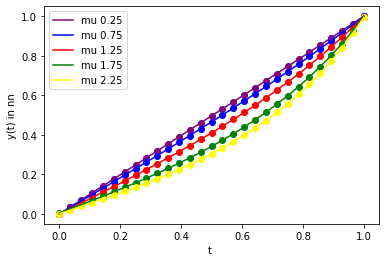

In [78]:
#Plotting


plt.scatter(time_points,y_nn_list4,color='purple')
plt.plot(time_points, y_nn_list4, label="mu 0.25", color='purple')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

plt.scatter(time_points,y_nn_list2,color='blue')
plt.plot(time_points, y_nn_list2, label="mu 0.75", color='blue')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

f1=plt.figure(1)
#print(len(time_points))
#print(len(y_nn_list))
plt.scatter(time_points,y_nn_list1,color='red')
plt.plot(time_points, y_nn_list1, label="mu 1.25", color='red')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

plt.scatter(time_points,y_nn_list,color='green')
plt.plot(time_points, y_nn_list, label="mu 1.75", color='green')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

plt.scatter(time_points,y_nn_list3,color='yellow')
plt.plot(time_points, y_nn_list3, label="mu 2.25", color='yellow')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

plt.legend()
plt.show()